# Winning Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook

In [3]:
# Take in all of our wrestling data and read it into pandas
path_2013 = "../Resources/WWE-Data-2013.csv"
WWE_2013 = pd.read_csv(path_2013)

path_2014 = "../Resources/WWE-Data-2014.csv"
WWE_2014 = pd.read_csv(path_2014)

path_2015 = "../Resources/WWE-Data-2015.csv"
WWE_2015 = pd.read_csv(path_2015)

path_2016 = "../Resources/WWE-Data-2016.csv"
WWE_2016 = pd.read_csv(path_2016)
WWE_2016.head()

,Wrestler,Wins,Losses,Draws
0,Dean Ambrose,133,67,4
1,Kevin Owens,61,130,2
2,Tyler Breeze,17,163,2
3,AJ Styles,108,68,0
4,Sami Zayn,111,59,6


In [4]:
# Merge
WWE_data = pd.merge(WWE_2013, WWE_2014, on='Wrestler', how='outer')
WWE_data.head()

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [5]:
#rename columns
WWE_data = WWE_data.rename(columns={"Wins_x":"2013 Wins", "Losses_x":"2013 Losses", "Draws_x":"2013 Draws", "Wins_y":"2014 Wins","Losses_y":"2014 Losses","Draws_y":"2014 Draws"})
WWE_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [6]:
#merge again with 2015
WWE_data = pd.merge(WWE_data, WWE_2015, how="outer", on="Wrestler")
WWE_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [7]:
WWE_data = WWE_data.rename(columns={"Wins":"2015 Wins","Losses":"2015 Losses","Draws":"2015 Draws"})
WWE_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [8]:
WWE_data = pd.merge(WWE_data, WWE_2016, how="outer", on="Wrestler")
WWE_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


In [9]:
WWE_data = WWE_data.rename(columns={"Wins":"2016 Wins","Losses":"2016 Losses","Draws":"2016 Draws"})
WWE_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


### Part 2 - Time to Calculate!

* When your tables have been merged together into one data frame, calculate the total number of wins, losses, and draws a wrestler has had over the course of their career. Also create a new column that will hold the total matches a wrestler has been in over the course of their career.

    * You will need to convert all NaN values to a number so that you can perform these calculations

* We are only interested in those wrestlers who have been with the WWE from 2013 to 2016. You will need to come up with some way of filtering out rows that do not meet these conditions.
    
    * Also set the 'Wrestler' column as your key for easier referencing later on.

In [10]:
#NA to 0
WWE_data = WWE_data.fillna(0)

#Summary stats
WWE_data["Total Wins"] = WWE_data["2013 Wins"] + WWE_data["2014 Wins"] + WWE_data["2015 Wins"] + WWE_data["2016 Wins"]
WWE_data["Total Losses"] = WWE_data["2013 Losses"] + WWE_data["2014 Losses"] + WWE_data["2015 Losses"] + WWE_data["2016 Losses"]
WWE_data["Total Draws"] = WWE_data["2013 Draws"] + WWE_data["2014 Draws"] + WWE_data["2015 Draws"] + WWE_data["2016 Draws"]
WWE_data["Total Matches"] = WWE_data["Total Wins"] + WWE_data["Total Losses"] + WWE_data["Total Draws"]

WWE_data.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0


In [11]:
WWE_vets = WWE_data.loc[(WWE_data["Total Matches"] >= 100) & (WWE_data["2013 Wins"] > 0) & (WWE_data["2016 Wins"] > 0)]

WWE_vets = WWE_vets.set_index("Wrestler")

WWE_vets.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0


### Part 3 - Charting Careers

* Store an individual wrestler's wins over time in a variable
* Store that same wrestler's losses over time in a variable as well
* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016

In [14]:
wrestler = input("What wrestler are you interested in?")


What wrestler are you interested in?Randy Orton


In [15]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wins = WWE_vets.loc[wrestler,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]

# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
losses = WWE_vets.loc[wrestler,["2013 Losses","2014 Losses","2015 Losses", "2016 Losses"]]

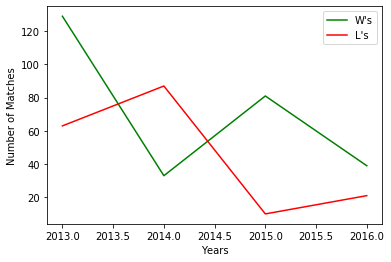

In [17]:
x = [2013,2014,2015,2016]

plt.plot(x, wins, color="green", label="W's")
plt.plot(x, losses, color="red", label="L's")

plt.legend(loc="best")

plt.xlabel("Years")
plt.ylabel("Number of Matches")

plt.show()